In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from functions import *
import fromaaron.KeplerTools as KT

In [2]:
datinit = np.genfromtxt('satcat_Feb10.csv', skip_header=1, dtype=str, delimiter=',')
datinit = pd.DataFrame(datinit)
headers = np.genfromtxt('satcat_Feb10.csv', dtype=str, delimiter=',', max_rows=1)
datinit.columns = headers

In [3]:
decayed = datinit.loc[datinit.DECAY!='""']
datremain = datinit.drop(decayed.index.values)
dat = datremain[['OBJECT_TYPE', 'DECAY', 'PERIOD', 'INCLINATION',
                 'APOGEE', 'PERIGEE', 'RCS_SIZE', 'LAUNCH_YEAR']]

In [4]:
excepts = []
for i in range(len(dat)):
    try:
        dat.iloc[i].PERIOD = float(dat.iloc[i].PERIOD[1:-1])
        dat.iloc[i].INCLINATION = float(dat.iloc[i].INCLINATION[1:-1])
        dat.iloc[i].APOGEE = float(dat.iloc[i].APOGEE[1:-1])
        dat.iloc[i].PERIGEE = float(dat.iloc[i].PERIGEE[1:-1])
    except:
        excepts.append(i)
excepts = np.array(excepts)
indices = dat.iloc[excepts].index.values
dat = dat.drop(indices)
dat = dat.drop(dat.loc[dat.PERIOD==0.].index.values)

In [5]:
dat['SMA'] = ((dat.PERIGEE + dat.APOGEE) / 2 + REkm) * 1000
dat['e'] = (dat.APOGEE - dat.PERIGEE) / (dat.APOGEE + dat.PERIGEE + 2*REkm)
dat['n'] = 2 * np.pi / (dat.PERIOD.values * 60)

In [6]:
dat = dat.drop(dat.loc[dat.PERIGEE.values > 2500].index.values)

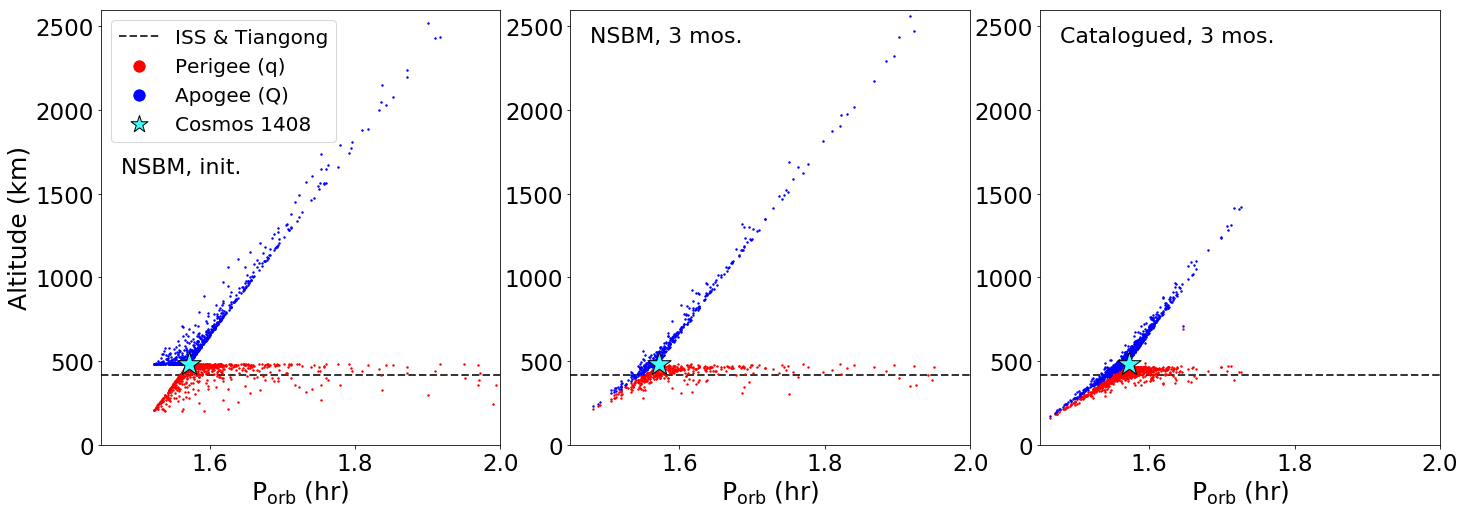

In [23]:
r1 = pd.read_hdf('sat2021/sims/russia/NSBM/data_0.1_1000_0.15_10.0.hdf', key='data')
r1mid = pd.read_hdf('sat2021/sims/russia/NSBM/gabbard_0.21_LEO_0.1_1000_0.15_10.0.hdf', key='data')
r1mid['ecc'] = r1mid.e.values
dlist = [r1, r1mid]
fig, ax = plt.subplots(1,3,figsize=(24,8))
for i, d in enumerate(dlist):
    data = d.loc[d.ecc<1.0]
    SMA = data.SMA.values
    eccs = data.ecc.values
    porb = period(data.SMA.values, G*Mearthkg)
    flag = (SMA*(1-eccs)/1000-REkm>200)
    ax[i].scatter(porb[flag]/3600, (SMA*(1-eccs)/1000-REkm)[flag], s=2, color='r', label='Perigee (q)')
    ax[i].scatter(porb[flag]/3600, (SMA*(1+eccs)/1000-REkm)[flag], s=2, color='b', label='Apogee (Q)')

ax[2].scatter(dat.PERIOD.values/60, dat.PERIGEE.values, s=2, color='r',label='Perigee (q)')
ax[2].scatter(dat.PERIOD.values/60, dat.APOGEE.values, s=2, color='b', label='Apogee (Q)')

for i in range(3):
    ax[i].scatter(94.3/60, 480, s=5, facecolor='xkcd:bright cyan', marker='*',
                  edgecolor='k', label='Cosmos 1408')
    ax[i].scatter(94.3/60, 480, s=600, facecolor="xkcd:bright cyan", marker='*', edgecolor='k')
    ax[i].axhline(417., ls='--', lw=2, color='xkcd:dark grey', label='ISS & Tiangong', zorder=0)
    ax[i].set_ylim(0, 2600)
    ax[i].set_xlim(1.45, 2.0) 
    ax[i].tick_params(labelsize=23)
    ax[i].set_xlabel(r'P$_{\rm{orb}}$ (hr)', fontsize=25)
ax[1].text(0.05, 0.925, 'NSBM, 3 mos.', 
                     transform=ax[1].transAxes, fontsize=22)
ax[0].text(0.05, 0.625, 'NSBM, init.'+'', 
                     transform=ax[0].transAxes, fontsize=22)
ax[2].text(0.05, 0.925, 'Catalogued, 3 mos.', 
                     transform=ax[2].transAxes, fontsize=22)

ax[0].legend(loc='upper left', frameon=True, fontsize=20, markerscale=8)
ax[0].set_ylabel('Altitude (km)', fontsize=25)
plt.subplots_adjust(wspace=0.175)
plt.savefig('gabbard_grid_Russia_NSBM.pdf')
plt.show()

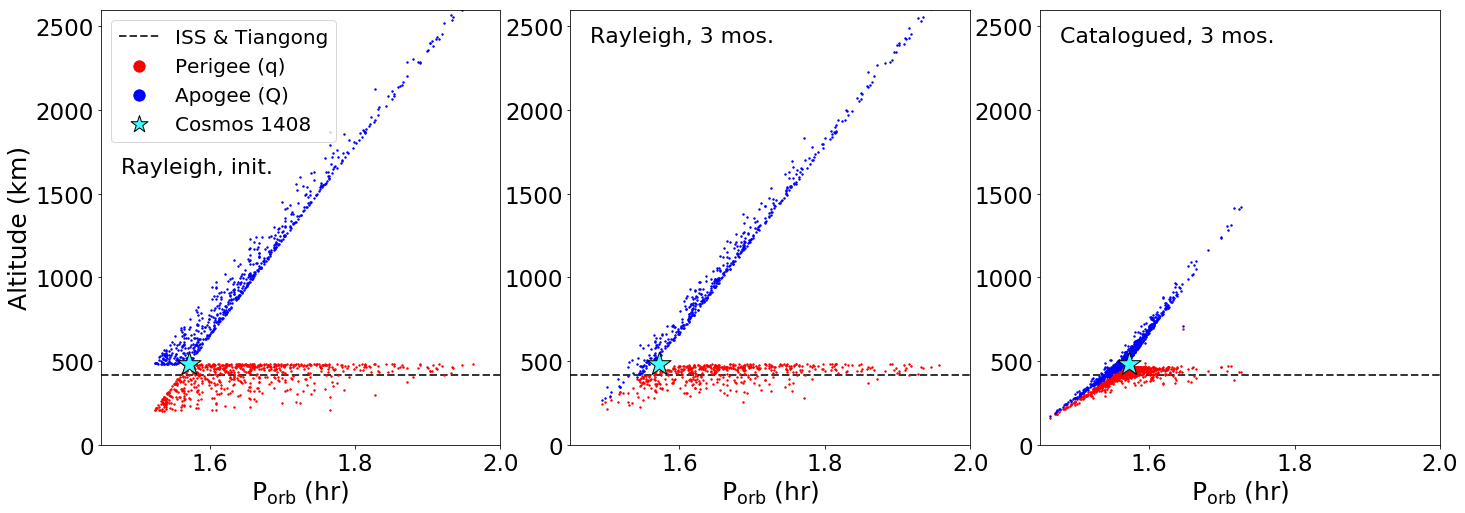

In [33]:
r1 = pd.read_hdf('sat2021/sims/russia/rayleigh/data_0.05_1000_0.15_10.0.hdf', key='data')
r1mid = pd.read_hdf('sat2021/sims/russia/rayleigh/gabbard_0.25_LEO_0.05_1000_0.15_10.0.hdf', key='data')
r1mid['ecc'] = r1mid.e.values
dlist = [r1, r1mid]
fig, ax = plt.subplots(1,3,figsize=(24,8))
for i, d in enumerate(dlist):
    data = d.loc[d.ecc<1.0]
    SMA = data.SMA.values
    eccs = data.ecc.values
    porb = period(data.SMA.values, G*Mearthkg)
    flag = (SMA*(1-eccs)/1000-REkm>200)
    ax[i].scatter(porb[flag]/3600, (SMA*(1-eccs)/1000-REkm)[flag], s=2, color='r', label='Perigee (q)')
    ax[i].scatter(porb[flag]/3600, (SMA*(1+eccs)/1000-REkm)[flag], s=2, color='b', label='Apogee (Q)')

ax[2].scatter(dat.PERIOD.values/60, dat.PERIGEE.values, s=2, color='r',label='Perigee (q)')
ax[2].scatter(dat.PERIOD.values/60, dat.APOGEE.values, s=2, color='b', label='Apogee (Q)')

for i in range(3):
    ax[i].scatter(94.3/60, 480, s=5, facecolor='xkcd:bright cyan', marker='*',
                  edgecolor='k', label='Cosmos 1408')
    ax[i].scatter(94.3/60, 480, s=600, facecolor="xkcd:bright cyan", marker='*', edgecolor='k')
    ax[i].axhline(417., ls='--', lw=2, color='xkcd:dark grey', label='ISS & Tiangong', zorder=0)
    ax[i].set_ylim(0, 2600)
    ax[i].set_xlim(1.45, 2.0) 
    ax[i].tick_params(labelsize=23)
    ax[i].set_xlabel(r'P$_{\rm{orb}}$ (hr)', fontsize=25)
ax[1].text(0.05, 0.925, 'Rayleigh, 3 mos.', 
                     transform=ax[1].transAxes, fontsize=22)
ax[0].text(0.05, 0.625, 'Rayleigh, init.'+'', 
                     transform=ax[0].transAxes, fontsize=22)
ax[2].text(0.05, 0.925, 'Catalogued, 3 mos.', 
                     transform=ax[2].transAxes, fontsize=22)

ax[0].legend(loc='upper left', frameon=True, fontsize=20, markerscale=8)
ax[0].set_ylabel('Altitude (km)', fontsize=25)
plt.subplots_adjust(wspace=0.175)
plt.savefig('gabbard_grid_Russia_rayleigh.pdf')
plt.show()